In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
dataset = pd.read_csv("1D.csv")
dataset = dataset.iloc[11:, :]*10**5 - 12000
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[124206. 124321. 125197. ... 100282. 100048.  99345.]
[124322. 125197. 124706. ... 100049.  99344.  99282.]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 

# Find high value by open value

In [36]:
x = dataset.iloc[:, 1:35]
y = dataset.iloc[:,   35]
x = x.values
y = y.values
y = y.reshape(len(y),1)
print(x)
print(y)

[[125854. 126019. 125603. ... 125521. 124239. 124206.]
 [125734. 125974. 125580. ... 124415. 124058. 124321.]
 [125932. 126310. 125565. ... 125274. 124175. 125197.]
 ...
 [ 96554.  97006.  96337. ... 100756. 100089. 100282.]
 [ 96895.  97731.  96669. ... 100400.  99742. 100048.]
 [ 97593.  97697.  97563. ... 100291.  99184.  99345.]]
[[124415.]
 [125274.]
 [125240.]
 ...
 [100400.]
 [100291.]
 [ 99449.]]


In [37]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[124422.77 124415.  ]
 [125268.3  125274.  ]
 [125402.05 125240.  ]
 ...
 [100556.9  100400.  ]
 [100272.45 100291.  ]
 [ 99564.55  99449.  ]]


In [39]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998069683143574

In [40]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1312.90625
142.2941474205159


# Find next low

In [41]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[125854.   126019.   125603.   ... 124239.   124206.   124422.77]
 [125734.   125974.   125580.   ... 124058.   124321.   125268.3 ]
 [125932.   126310.   125565.   ... 124175.   125197.   125402.05]
 ...
 [ 96554.    97006.    96337.   ... 100089.   100282.   100556.9 ]
 [ 96895.    97731.    96669.   ...  99742.   100048.   100272.45]
 [ 97593.    97697.    97563.   ...  99184.    99345.    99564.55]]


In [42]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[124058.]
 [124175.]
 [124636.]
 ...
 [ 99742.]
 [ 99184.]
 [ 99213.]]


In [43]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[123758.66 124058.  ]
 [123957.35 124175.  ]
 [124663.95 124636.  ]
 ...
 [ 99838.26  99742.  ]
 [ 99353.12  99184.  ]
 [ 99056.79  99213.  ]]


In [45]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998318345938437

In [46]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1124.7734375000146
132.76697004349134


# Find close

In [47]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[125854.   126019.   125603.   ... 124206.   124422.77 123758.66]
 [125734.   125974.   125580.   ... 124321.   125268.3  123957.35]
 [125932.   126310.   125565.   ... 125197.   125402.05 124663.95]
 ...
 [ 96554.    97006.    96337.   ... 100282.   100556.9   99838.26]
 [ 96895.    97731.    96669.   ... 100048.   100272.45  99353.12]
 [ 97593.    97697.    97563.   ...  99345.    99564.55  99056.79]]


In [48]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[124322.]
 [125197.]
 [124706.]
 ...
 [100049.]
 [ 99344.]
 [ 99282.]]


In [49]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[124248.66 124322.  ]
 [124825.84 125197.  ]
 [124962.09 124706.  ]
 ...
 [100142.39 100049.  ]
 [ 99445.6   99344.  ]
 [ 99289.8   99282.  ]]


In [51]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9998372457969689

In [52]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

842.1015625
131.03231228754245


# Checking ascending

In [53]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
x = np.concatenate((x, yPredClose.reshape(len(yPredClose), 1)), 1)
print(x)

[[125854.   126019.   125603.   ... 124422.77 123758.66 124248.66]
 [125734.   125974.   125580.   ... 125268.3  123957.35 124825.84]
 [125932.   126310.   125565.   ... 125402.05 124663.95 124962.09]
 ...
 [ 96554.    97006.    96337.   ... 100556.9   99838.26 100142.39]
 [ 96895.    97731.    96669.   ... 100272.45  99353.12  99445.6 ]
 [ 97593.    97697.    97563.   ...  99564.55  99056.79  99289.8 ]]


In [54]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[2402   35]
 [  20 2544]]


0.989002199560088

In [56]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(5001,)
[[2154  283]
 [ 281 2283]]


0.8872225554889022

In [57]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [58]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

      high error   low error  close error
0       7.765625  299.343750    73.343750
1       5.695312  217.648438   371.164062
2     162.046875   27.953125   256.085938
3     106.343750   52.296875   112.507812
4      10.007812  371.203125   381.179688
...          ...         ...          ...
4996   22.992188   16.476562    29.148437
4997   11.093750  192.976562    42.070312
4998  156.898437   96.257812    93.390625
4999   18.546875  169.125000   101.601562
5000  115.554688  156.210938     7.804688

[5001 rows x 3 columns]


In [59]:
x = []
for i in range(5001):
    x.append(i)

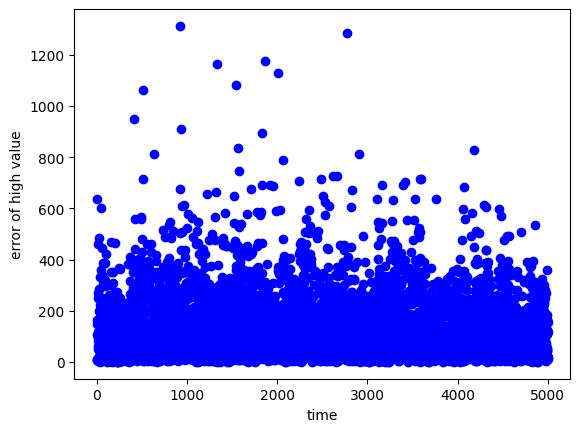

In [60]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [61]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

2351


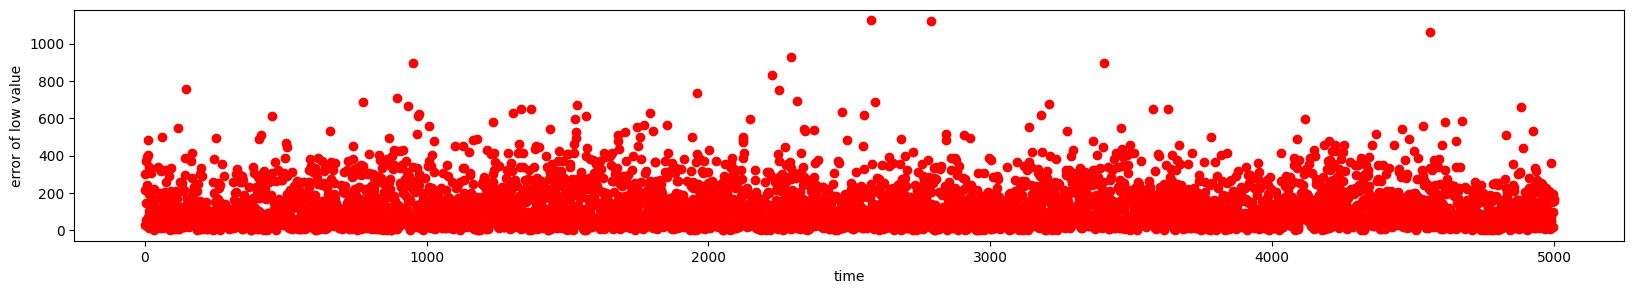

In [62]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [63]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

2474


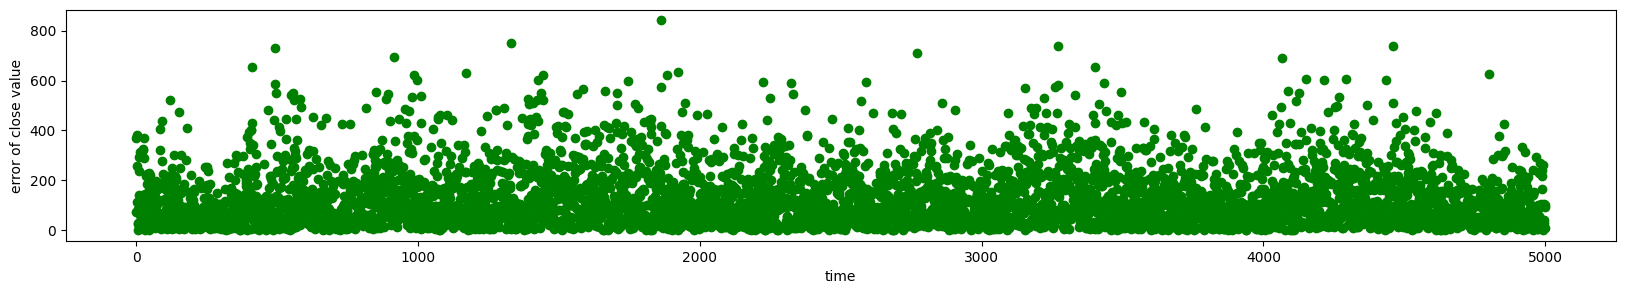

In [64]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [65]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

2539


In [66]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 47.010597880423916
percent of under 100 for low is 49.47010597880424
percent of under 100 for close is 50.76984603079384


In [67]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 75.5248950209958
percent of under 200 for low is 78.24435112977405
percent of under 200 for close is 77.9244151169766


In [68]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 62.98740251949611
percent of under 150 for low is 66.48670265946811
percent of under 150 for close is 66.70665866826636
